In [49]:
import csv
import networkx as nx
import csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

green_spotify = "#1DB954"
black_spotify = "#121212" 
grey_spotify = "#535353"
white_spotify = "#b3b3b3"

In [63]:
def categorizar_popularidad(p):
    p = int(p)
    if p < 25:
        return "Desconocido"
    if p < 50:
        return "Poco popular"
    if p < 75:
        return "Popular"
    return "Muy popular"

In [65]:
artists = {}
comms = {}
with open("data/nodes_comunities.csv", "r") as nodes:
    reader = csv.reader(nodes, delimiter=',')
    next(reader, None) # skip header
    for row in reader:
        id = row[0]
        name = row[2]
        pop = int(row[3])
        sex = row[6]
        genre = row[7]
        modclass = int(row[-1])
        artists[id] = {
            "id":id,
            "name":name,
            "pop":pop,
            "cat-pop":categorizar_popularidad(pop),
            "sex":sex,
            "genre":genre,
            "mod":modclass
        }
        if modclass not in comms:
            comms[modclass] = []
        comms[modclass].append(artists[id])

In [82]:
def process_community(mapa, community, discriminant):
    total = 0
    for artist in community:
        dis = artist[discriminant]
        mapa[dis] += 1
        total += 1
    for dis in mapa:
        mapa[dis] /= total
    return mapa

In [131]:
tipos = ["Masculino", "Femenino", "Grupo musical"]
communities_ns = sorted(list(comms.keys()))
mapa = {c:{tipo_j:0 for tipo_j in tipos} for c in communities_ns}
for cmod in communities_ns:
    process_community(mapa[cmod], comms[cmod], "sex")

In [132]:
colors = [green_spotify, white_spotify, grey_spotify]
font_colors = [black_spotify, black_spotify, white_spotify]
def plot_homofilia(mapa, colors=colors, font_colors=font_colors, title="sexo"):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(3, 4.8))
    df = pd.DataFrame(mapa).T
    
    df.plot(kind='barh', stacked=True, figsize=(5, 6), ax=ax, color=colors)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'Proporción de {title} en cada comunidad')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), # bbox_to_anchor=(1, 0, 0.5, 1)
              fancybox=True, shadow=True, ncol=2)

    i = 0
    for c in ax.containers:
        label = c.get_label()
        labels = []
        for x in df[label]:
            if x >= 0.07:
                labels.append(str(round(x, 2)))
            else:
                labels.append("")             
        # add the annotation
        ax.bar_label(c, labels=labels, label_type='center', fontweight='bold', color=font_colors[i], fontsize=8)
        i+=1
    ax.set_xticks([])

    plt.show()

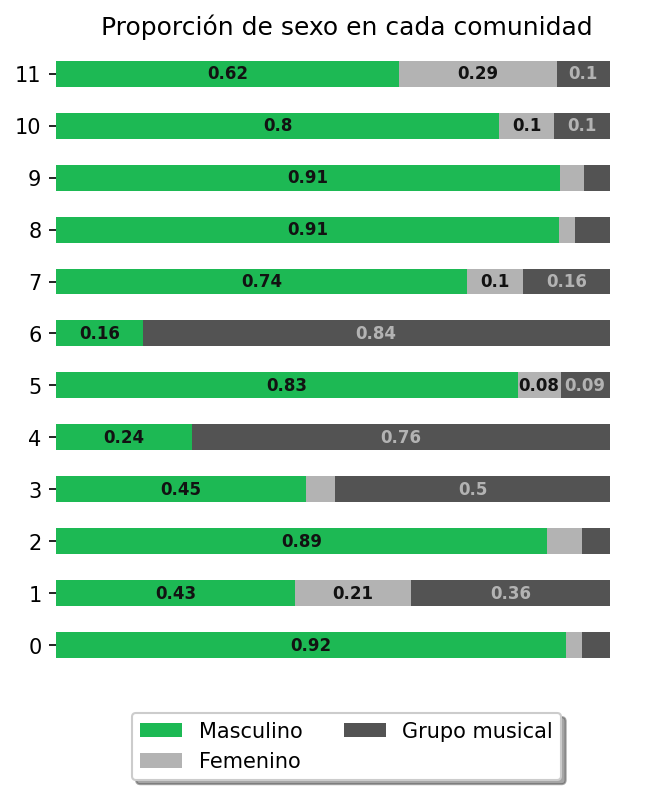

In [133]:
plot_homofilia(mapa)

In [102]:
tipos = ["Desconocido", "Poco popular", "Popular", "Muy popular"]
communities_ns = sorted(list(comms.keys()))
mapa = {c:{tipo_j:0 for tipo_j in tipos} for c in communities_ns}
for cmod in communities_ns:
    process_community(mapa[cmod], comms[cmod], "cat-pop")

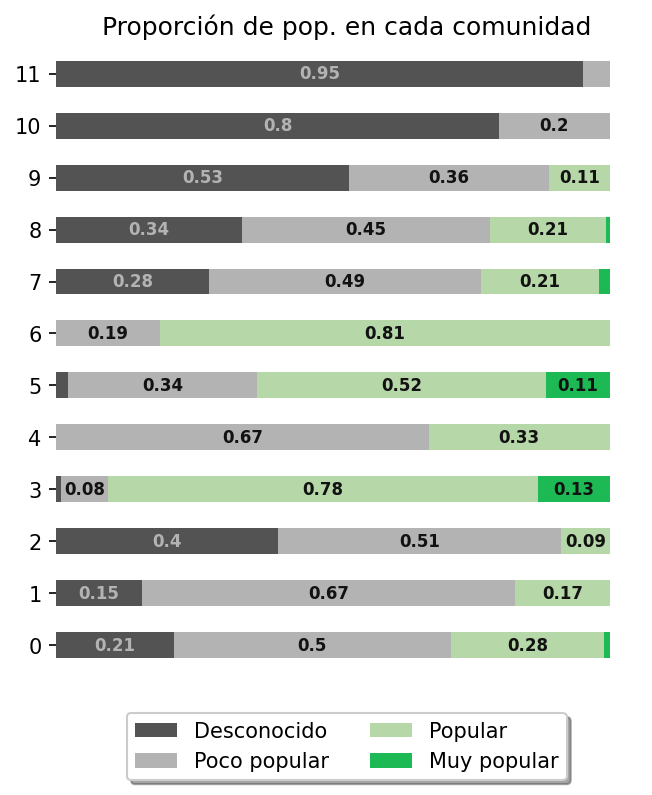

In [130]:
_colors = [grey_spotify, white_spotify, "#b6d7a8", green_spotify]
_font_colors = [white_spotify, black_spotify, black_spotify, black_spotify]

plot_homofilia(mapa, _colors, _font_colors, "pop.")

In [78]:
tipos = ["Musica urbana - Latino", "Pop - Latino", "Musica mexicana", "Musica urbana - Argentino", "Pop/Rock - Argentino", "Other", "Folklore", "Electronica"]
communities_ns = sorted(list(comms.keys()))
mapa = {c:{tipo_j:0 for tipo_j in tipos} for c in communities_ns}
for cmod in communities_ns:
    process_community(mapa[cmod], comms[cmod], "genre")

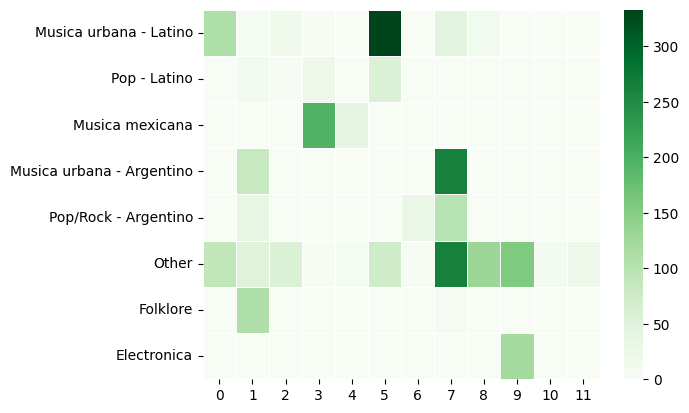

In [80]:
df = pd.DataFrame(mapa)

ax = sns.heatmap(df, linewidth=0.5, cmap="Greens")
#ax.collections[0].set_clim(0, 1)
plt.show()